Assessment test for vaccination data

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# install spark 
!wget -q https://archive.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz

In [ ]:
# unzip the spark file to the current folder
!tar xf spark-2.4.8-bin-hadoop2.7.tgz

In [ ]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"


In [ ]:
# install findspark using pip
!pip install -q findspark


In [ ]:
#importing findspark
import findspark

In [ ]:
findspark.init()

In [ ]:
findspark.find()

'/content/spark-2.4.8-bin-hadoop2.7'

In [ ]:
# install findspark using pip
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 39.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=1e15497851b78a1bacb2947beefa7e58bbe1c8492bc825cbdcae8a0c07d1c430
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
#creating sparksession 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("incubyte").getOrCreate()

In [ ]:
#reading the data
ind_data=spark.read.csv('IND.csv',header=True,inferSchema=True)

In [ ]:
#dispalying the data 
ind_data.show()

+---+------+-------------------+---------------+-------------------+------------+
| ID|  Name|                DOB|VaccinationType|    VaccinationDate|Free or Paid|
+---+------+-------------------+---------------+-------------------+------------+
|  1| Vikas|1998-12-01 00:00:00|            XYZ|2022-01-01 00:00:00|           F|
|  2| Rahul|1982-08-13 00:00:00|            ABC|2022-03-05 00:00:00|           P|
|  3|Sameer|1952-08-13 00:00:00|            ABC|2022-02-20 00:00:00|           F|
+---+------+-------------------+---------------+-------------------+------------+



In [ ]:
#importing pyspark funcations
from pyspark.sql.functions import lit

In [ ]:
#adding column
ind_data = ind_data.withColumn("country", lit("ind"))

In [ ]:
ind_data.show()

+---+------+-------------------+---------------+-------------------+------------+-------+
| ID|  Name|                DOB|VaccinationType|    VaccinationDate|Free or Paid|country|
+---+------+-------------------+---------------+-------------------+------------+-------+
|  1| Vikas|1998-12-01 00:00:00|            XYZ|2022-01-01 00:00:00|           F|    ind|
|  2| Rahul|1982-08-13 00:00:00|            ABC|2022-03-05 00:00:00|           P|    ind|
|  3|Sameer|1952-08-13 00:00:00|            ABC|2022-02-20 00:00:00|           F|    ind|
+---+------+-------------------+---------------+-------------------+------------+-------+



In [ ]:
usa_data=spark.read.csv('USA.csv',header=True,inferSchema=True)

In [ ]:
usa_data.show()

+---+----+---------------+---------------+
| ID|Name|VaccinationType|VaccinationDate|
+---+----+---------------+---------------+
|  1| Sam|            EFG|        6152022|
|  2|John|            XYZ|        1052022|
|  3|Mike|            ABC|       12282021|
+---+----+---------------+---------------+



In [ ]:
usa_data = usa_data.withColumn("country", lit("usa"))

In [ ]:
usa_data.show()

+---+----+---------------+---------------+-------+
| ID|Name|VaccinationType|VaccinationDate|country|
+---+----+---------------+---------------+-------+
|  1| Sam|            EFG|        6152022|    usa|
|  2|John|            XYZ|        1052022|    usa|
|  3|Mike|            ABC|       12282021|    usa|
+---+----+---------------+---------------+-------+



In [ ]:
import pandas as pd 
data=pd.read_excel('AUS.xlsx')


In [ ]:
data

,Unique ID,Patient Name,Vaccine Type,Date of Birth,Date of Vaccination
0,1,Mike,LMN,NaT,2022-05-11 00:00:00
1,2,Jonnathan,XYZ,1997-12-13,2021-13-12
2,3,Cristina,ABC,1998-03-12,2022-03-12 00:00:00


In [ ]:
#droping the column
data.drop('Date of Vaccination',axis=1,inplace=True)

In [ ]:
#converting the pandas dataframe to spark datafraame
aus_data=spark.createDataFrame(data) 
aus_data.printSchema()
aus_data.show()

root
 |-- Unique ID: long (nullable = true)
 |-- Patient Name: string (nullable = true)
 |-- Vaccine Type: string (nullable = true)
 |-- Date of Birth: timestamp (nullable = true)

+---------+------------+------------+-------------------+
|Unique ID|Patient Name|Vaccine Type|      Date of Birth|
+---------+------------+------------+-------------------+
|        1|        Mike|         LMN|               null|
|        2|   Jonnathan|         XYZ|1997-12-13 00:00:00|
|        3|    Cristina|         ABC|1998-03-12 00:00:00|
+---------+------------+------------+-------------------+



In [ ]:
aus_data = aus_data.withColumn("country", lit("aus"))

In [ ]:
aus_data.show()

+---------+------------+------------+-------------------+-------+
|Unique ID|Patient Name|Vaccine Type|      Date of Birth|country|
+---------+------------+------------+-------------------+-------+
|        1|        Mike|         LMN|               null|    aus|
|        2|   Jonnathan|         XYZ|1997-12-13 00:00:00|    aus|
|        3|    Cristina|         ABC|1998-03-12 00:00:00|    aus|
+---------+------------+------------+-------------------+-------+



In [ ]:
ind_data.show()
aus_data.show()
usa_data.show()

+---+------+-------------------+---------------+-------------------+------------+-------+
| ID|  Name|                DOB|VaccinationType|    VaccinationDate|Free or Paid|country|
+---+------+-------------------+---------------+-------------------+------------+-------+
|  1| Vikas|1998-12-01 00:00:00|            XYZ|2022-01-01 00:00:00|           F|    ind|
|  2| Rahul|1982-08-13 00:00:00|            ABC|2022-03-05 00:00:00|           P|    ind|
|  3|Sameer|1952-08-13 00:00:00|            ABC|2022-02-20 00:00:00|           F|    ind|
+---+------+-------------------+---------------+-------------------+------------+-------+

+---------+------------+------------+-------------------+-------+
|Unique ID|Patient Name|Vaccine Type|      Date of Birth|country|
+---------+------------+------------+-------------------+-------+
|        1|        Mike|         LMN|               null|    aus|
|        2|   Jonnathan|         XYZ|1997-12-13 00:00:00|    aus|
|        3|    Cristina|         ABC|19

In [ ]:
from pyspark.sql.functions import col

In [ ]:
#droping the unwanted columns
cols = ("DOB","VaccinationDate","Free or Paid")
ind_data1=ind_data.drop(*cols)
aus_data1=aus_data.drop(col("Date of Birth"))
usa_data1=usa_data.drop(col("VaccinationDate"))

In [ ]:
ind_data1.show()
aus_data1.show()
usa_data1.show()

+---+------+---------------+-------+
| ID|  Name|VaccinationType|country|
+---+------+---------------+-------+
|  1| Vikas|            XYZ|    ind|
|  2| Rahul|            ABC|    ind|
|  3|Sameer|            ABC|    ind|
+---+------+---------------+-------+

+---------+------------+------------+-------+
|Unique ID|Patient Name|Vaccine Type|country|
+---------+------------+------------+-------+
|        1|        Mike|         LMN|    aus|
|        2|   Jonnathan|         XYZ|    aus|
|        3|    Cristina|         ABC|    aus|
+---------+------------+------------+-------+

+---+----+---------------+-------+
| ID|Name|VaccinationType|country|
+---+----+---------------+-------+
|  1| Sam|            EFG|    usa|
|  2|John|            XYZ|    usa|
|  3|Mike|            ABC|    usa|
+---+----+---------------+-------+



In [ ]:
#mergeing the data using union ,unionByName 
join_ind_usa=ind_data1.unionByName(usa_data1)

In [ ]:
#changing the columns name 
aus_change=aus_data1.withColumnRenamed("Unique ID","ID").withColumnRenamed("Patient Name","Name").withColumnRenamed("Vaccine Type","VaccinationType")

In [ ]:
final_data=join_ind_usa.unionByName(aus_change)

In [ ]:
#final_data set
final_data.show()

+---+---------+---------------+-------+
| ID|     Name|VaccinationType|country|
+---+---------+---------------+-------+
|  1|    Vikas|            XYZ|    ind|
|  2|    Rahul|            ABC|    ind|
|  3|   Sameer|            ABC|    ind|
|  1|      Sam|            EFG|    usa|
|  2|     John|            XYZ|    usa|
|  3|     Mike|            ABC|    usa|
|  1|     Mike|            LMN|    aus|
|  2|Jonnathan|            XYZ|    aus|
|  3| Cristina|            ABC|    aus|
+---+---------+---------------+-------+



In [ ]:
#CountryName, VaccinationType, No. of vaccinations
final_data.groupBy("country","VaccinationType").count().show()

+-------+---------------+-----+
|country|VaccinationType|count|
+-------+---------------+-----+
|    aus|            ABC|    1|
|    aus|            LMN|    1|
|    usa|            EFG|    1|
|    ind|            XYZ|    1|
|    ind|            ABC|    2|
|    usa|            ABC|    1|
|    usa|            XYZ|    1|
|    aus|            XYZ|    1|
+-------+---------------+-----+



In [ ]:
import pyspark.sql.functions as F

In [ ]:
#	% vaccination in each country 
tot = final_data.count()
final_data.groupBy("country") \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

+-------+-------------+-------------------+
|country|cnt_per_group|perc_of_count_total|
+-------+-------------+-------------------+
|    ind|            3|  33.33333333333333|
|    aus|            3|  33.33333333333333|
|    usa|            3|  33.33333333333333|
+-------+-------------+-------------------+



In [ ]:
chat1=final_data.groupBy("country") \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .toPandas()

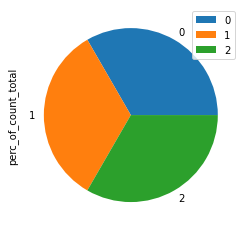

In [ ]:
#pie chart
chat1.plot('country','perc_of_count_total', kind='pie')

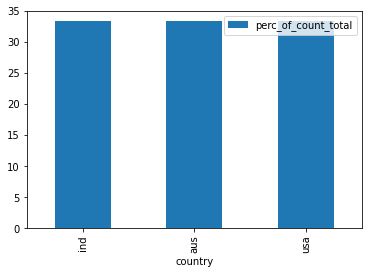

In [ ]:
#bar chat
chat1.plot('country','perc_of_count_total', kind='bar')

In [ ]:
#	% vaccination in each VaccinationType
final_data.groupBy("VaccinationType",) \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

+---------------+-------------+-------------------+
|VaccinationType|cnt_per_group|perc_of_count_total|
+---------------+-------------+-------------------+
|            EFG|            1|  11.11111111111111|
|            LMN|            1|  11.11111111111111|
|            XYZ|            3|  33.33333333333333|
|            ABC|            4|  44.44444444444444|
+---------------+-------------+-------------------+



In [ ]:
chat2=final_data.groupBy("VaccinationType",) \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .toPandas()

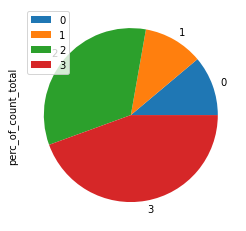

In [ ]:
chat2.plot('VaccinationType','perc_of_count_total', kind='pie')

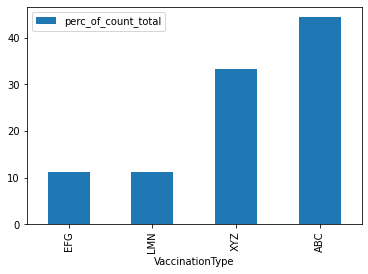

In [ ]:
chat2.plot('VaccinationType', 'perc_of_count_total', kind='bar')

In [ ]:
#	% vaccination in each VaccinationType and country
final_data.groupBy("country","VaccinationType",) \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

+-------+---------------+-------------+-------------------+
|country|VaccinationType|cnt_per_group|perc_of_count_total|
+-------+---------------+-------------+-------------------+
|    aus|            ABC|            1|  11.11111111111111|
|    aus|            LMN|            1|  11.11111111111111|
|    usa|            EFG|            1|  11.11111111111111|
|    ind|            XYZ|            1|  11.11111111111111|
|    ind|            ABC|            2|  22.22222222222222|
|    usa|            ABC|            1|  11.11111111111111|
|    usa|            XYZ|            1|  11.11111111111111|
|    aus|            XYZ|            1|  11.11111111111111|
+-------+---------------+-------------+-------------------+



In [ ]:
chat=final_data.groupBy("country","VaccinationType",) \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .toPandas()

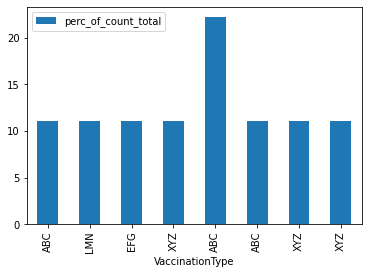

In [ ]:
chat.plot('VaccinationType','perc_of_count_total', kind='bar')

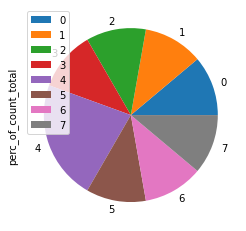

In [ ]:
chat.plot('VaccinationType', 'perc_of_count_total', kind='pie')